In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
warnings.filterwarnings("ignore")

# Kiểm định tính dừng của dữ liệu

In [4]:
df = pd.read_csv('stock_data_output/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

,ACB,AGR,BID,VCB,CTG
2017-01-03,4710,2380.0,9800.0,23210.0,9970.0
2017-01-04,4740,2290.0,9990.0,23050.0,10160.0
2017-01-05,4740,2330.0,9960.0,23150.0,10220.0
2017-01-06,4990,2320.0,10180.0,23610.0,10310.0
2017-01-09,5160,2350.0,10480.0,24110.0,10590.0


In [5]:
for col in df.columns:
    result = adfuller(df[col])
    print('{} stock ADF Statistic: %f'.format(col) % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ACB stock ADF Statistic: -0.408388
p-value: 0.908689
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
AGR stock ADF Statistic: -0.762170
p-value: 0.829982
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
BID stock ADF Statistic: -0.913070
p-value: 0.783638
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
VCB stock ADF Statistic: -0.789199
p-value: 0.822274
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
CTG stock ADF Statistic: -1.102408
p-value: 0.714111
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Các chuỗi dữ liệu đều có p-value > 0.05. Chuỗi không có tính dừng.

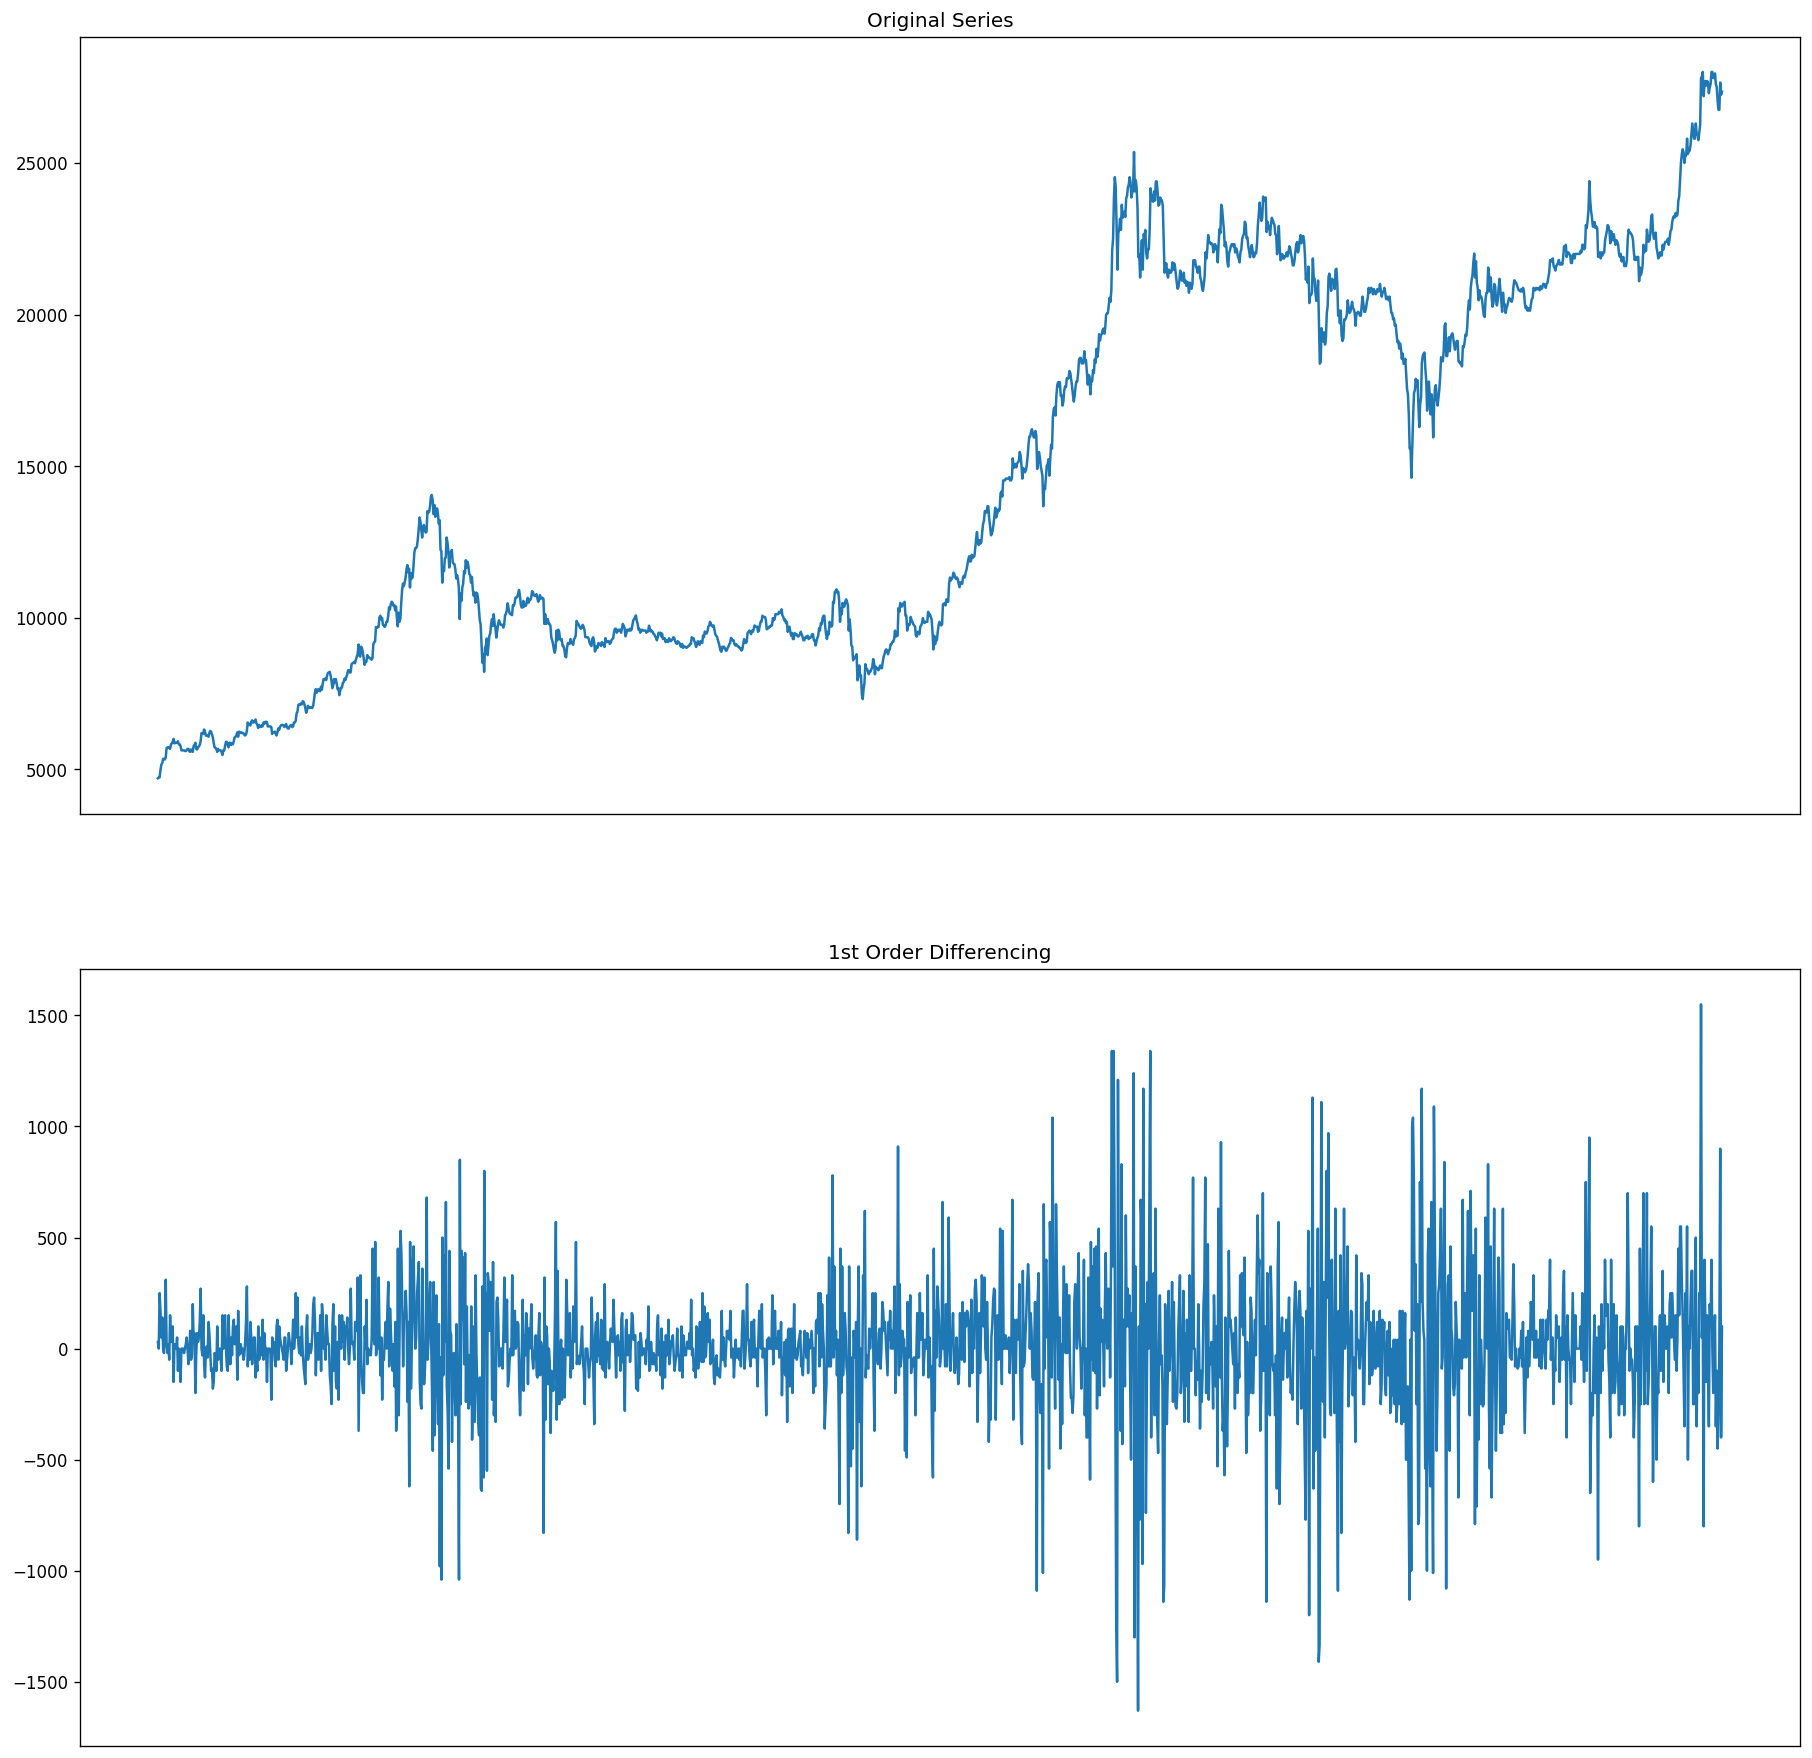

In [6]:
# Original Series
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(df.ACB); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.ACB.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
fig.set_size_inches(18.5, 18.5)

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
minPar = (0,0,0)
minParS = (0,0,0,0)
minAIC = 10**9

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.ACB,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if minAIC > results.aic:
                minPar = param
                minParS = param_seasonal
                minAIC = results.AIC

        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10868D+01    |proj g|=  3.17968D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.180D-08   1.109D+01
  F =   11.086795564728316     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16158D+00    |proj g|=  5.12540D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   2.044D-05   8.161D+00
  F =   8.1605534070324239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.2

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20531D+00    |proj g|=  2.16154D-01

At iterate    5    f=  8.20475D+00    |proj g|=  4.00163D-01

At iterate   10    f=  8.20339D+00    |proj g|=  3.09850D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     28      1     0     0   3.098D-04   8.203D+00
  F =   8.2033918735080125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16362D+00    |proj g|=  4.99991D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15978D+00    |proj g|=  3.49771D-02


 This problem is unconstrained.



At iterate    5    f=  8.15648D+00    |proj g|=  2.65192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   1.951D-05   8.156D+00
  F =   8.1564766200970116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07119D+01    |proj g|=  7.32185D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.07115D+01    |proj g|=  4.64793D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   4.648D-05   1.071D+01
  F =   10.711509989485490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05689D+01    |proj g|=  1.26522D+00

At iterate    5    f=  1.05483D+01    |proj g|=  8.03547D-02

At iterate   10    f=  1.05481D+01    |proj g|=  5.93449D-05

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87537D+00    |proj g|=  7.63745D-01

At iterate    5    f=  7.82545D+00    |proj g|=  5.04992D-03


 This problem is unconstrained.



At iterate   10    f=  7.82542D+00    |proj g|=  2.59605D-03

At iterate   15    f=  7.82447D+00    |proj g|=  3.95699D-02

At iterate   20    f=  7.76129D+00    |proj g|=  3.09021D-01

At iterate   25    f=  7.73256D+00    |proj g|=  9.40156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   6.676D-07   7.733D+00
  F =   7.7325603377967855     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.05235D+01    |proj g|=  6.23398D-05

At iterate   10    f=  1.05234D+01    |proj g|=  1.93154D-03

At iterate   15    f=  9.51430D+00    |proj g|=  2.01054D+00

At iterate   20    f=  7.81787D+00    |proj g|=  1.23355D+00

At iterate   25    f=  7.80354D+00    |proj g|=  1.21718D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     50      1     0     0   1.396D-05   7.804D+00
  F =   7.8035380148030189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.05117D+01    |proj g|=  6.22737D-05

At iterate   10    f=  1.04958D+01    |proj g|=  3.09389D-02

At iterate   15    f=  8.22341D+00    |proj g|=  1.03345D+00

At iterate   20    f=  7.88918D+00    |proj g|=  9.28778D-01

At iterate   25    f=  7.77917D+00    |proj g|=  4.47231D-01

At iterate   30    f=  7.77433D+00    |proj g|=  2.73401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     74      1     0     0   2.734D-04   7.774D+00
  F =   7.7743259494792465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  7.83263D+00    |proj g|=  1.61605D-02

At iterate   15    f=  7.81863D+00    |proj g|=  1.85550D-01

At iterate   20    f=  7.73830D+00    |proj g|=  3.88641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   4.573D-06   7.738D+00
  F =   7.7382531778159320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87557D+00    |proj g|=  7.64968D-01

At iterate    5    f=  7.82439D+00    |proj g|=  3.44397D-03

At iterate   10    f=  7.82383D+00    |proj g|=  1.66533D-02

At iterate   15    f=  7.82374D+00    |proj g|=  1.58626D-03

At iterate   20    f=  7.82341D+00    |proj g|=  2.51875D-02

At iterate   25    f=  7.80549D+00    |proj g|=  1.47556D-01

At iterate   30    f=  7.73541D+00    |proj g|=  3.67771D-02

At iterate   35    f=  7.72921D+00    |proj g|=  2.13441D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39558D+00    |proj g|=  1.87449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   7.216D-06   7.396D+00
  F =   7.3955633236940397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04847D+00    |proj g|=  7.46532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      4      1     0     0   4.279D-05   7.048D+00
  F =   7.0484746134332390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08038D+00    |proj g|=  2.11760D-01


 This problem is unconstrained.



At iterate    5    f=  7.02808D+00    |proj g|=  1.30012D-02

At iterate   10    f=  7.02803D+00    |proj g|=  3.57438D-03

At iterate   15    f=  7.02782D+00    |proj g|=  5.63843D-02

At iterate   20    f=  7.01955D+00    |proj g|=  2.17975D-01

At iterate   25    f=  7.01480D+00    |proj g|=  5.17879D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   3.585D-05   7.015D+00
  F =   7.0147920269381689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08953D+00    |proj g|=  1.57934D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   1.951D-06   7.090D+00
  F =   7.0895261169028787     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12675D+00    |proj g|=  1.43436D-01

At iterate    5    f=  7.10617D+00    |proj g|=  6.78931D-02

At iterate   10    f=  7.10517D+00    |proj g|=  1.26559D-03

At iterate   15    f=  7.10506D+00    |proj g|=  2.23374D-02

At iterate   20    f=  7.09613D+00    |proj g|=  1.35175D-01

At iterate   25    f=  7.04511D+00    |proj g|=  3.76824D-01

At iterate   30    f=  7.01135D+00    |proj g|=  1.07337D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05198D+00    |proj g|=  2.65057D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   1.178D-05   7.052D+00
  F =   7.0519790742636266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.



At iterate   10    f=  7.21053D+00    |proj g|=  8.17099D-02

At iterate   15    f=  7.19363D+00    |proj g|=  4.76023D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   8.810D-06   7.194D+00
  F =   7.1936341931467007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13602D+00    |proj g|=  1.33605D-01

At iterate    5    f=  7.10658D+00    |proj g|=  3.38068D-02

At iterate   10    f=  7.10499D+00    |proj g|=  1.16914D-03

At iterate   15    f=  7.10491D+00    |proj g|=  7.52494D-03

At iterate   20    f=  7.09615D+00    |proj g|=  9.88889D-02

At iterate   25    f=  7.01420D+00    |proj g|=  1.41452D-01

At iterate   30    f=  7.01102D+00    |proj g|=  2.73926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.37001D+00    |proj g|=  3.45961D+00

At iterate   10    f=  7.34567D+00    |proj g|=  1.26597D-03

At iterate   15    f=  7.34552D+00    |proj g|=  1.94091D-02

At iterate   20    f=  7.32836D+00    |proj g|=  2.47881D-01

At iterate   25    f=  7.10874D+00    |proj g|=  1.33991D-01

At iterate   30    f=  7.07850D+00    |proj g|=  1.84439D+00

At iterate   35    f=  7.06083D+00    |proj g|=  8.84917D-02

At iterate   40    f=  7.05560D+00    |proj g|=  5.07827D-02

At iterate   45    f=  7.05415D+00    |proj g|=  3.47298D-01

At iterate   50    f=  7.05325D+00    |proj g|=  1.42932D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37493D+00    |proj g|=  2.71632D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   2.716D-05   7.375D+00
  F =   7.3749262361140344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56693D+00    |proj g|=  1.02078D+00

At iterate    5    f=  7.20361D+00    |proj g|=  3.99998D+00

At iterate   10    f=  7.05154D+00    |proj g|=  2.34001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     40      1     0     0   2.340D-03   7.052D+00
  F =   7.0515395828147760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.05857D+00    |proj g|=  4.35212D+00

At iterate   10    f=  7.05386D+00    |proj g|=  2.19729D-02

At iterate   15    f=  7.05375D+00    |proj g|=  6.36035D-01

At iterate   20    f=  7.05199D+00    |proj g|=  9.37943D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     71      2     0     0   7.537D-03   7.052D+00
  F =   7.0515389868975697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28087D+00    |proj g|=  3.92924D-01


 This problem is unconstrained.



At iterate    5    f=  7.19856D+00    |proj g|=  1.16922D-03

At iterate   10    f=  7.19814D+00    |proj g|=  2.72062D-02

At iterate   15    f=  7.18558D+00    |proj g|=  1.12175D-01

At iterate   20    f=  7.17881D+00    |proj g|=  2.10796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   2.108D-05   7.179D+00
  F =   7.1788136391481636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.12357D+00    |proj g|=  2.08941D-01

At iterate   10    f=  7.10149D+00    |proj g|=  1.55608D-01

At iterate   15    f=  7.10059D+00    |proj g|=  1.13923D-03

At iterate   20    f=  7.10048D+00    |proj g|=  7.93168D-02

At iterate   25    f=  7.08348D+00    |proj g|=  8.27395D-01

At iterate   30    f=  7.03924D+00    |proj g|=  3.05347D-01

At iterate   35    f=  7.01872D+00    |proj g|=  3.80306D-01

At iterate   40    f=  7.01847D+00    |proj g|=  1.33966D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     61      1     0     0   6.390D-05   7.018D+00
  F =   7.01846715133

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09259D+00    |proj g|=  1.52567D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     10      1     0     0   1.515D-02   7.093D+00
  F =   7.0925922962849199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.4

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      7      1     0     0   2.911D-06   7.370D+00
  F =   7.3695769327273730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26899D+00    |proj g|=  3.79764D-01


 This problem is unconstrained.



At iterate    5    f=  7.09773D+00    |proj g|=  6.32003D-02

At iterate   10    f=  7.09653D+00    |proj g|=  4.95604D-03

At iterate   15    f=  7.09651D+00    |proj g|=  1.18471D-02

At iterate   20    f=  7.09500D+00    |proj g|=  1.76070D-01

At iterate   25    f=  7.02270D+00    |proj g|=  6.35034D-01

At iterate   30    f=  7.01492D+00    |proj g|=  5.15254D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     44      1     0     0   1.169D-05   7.015D+00
  F =   7.0149137123715493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  7.06595D+00    |proj g|=  3.94009D+00

At iterate   20    f=  7.05137D+00    |proj g|=  4.39911D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     31      1     0     0   3.639D-03   7.051D+00
  F =   7.0513654032459083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42074D+00    |proj g|=  8.78642D-01


 This problem is unconstrained.



At iterate    5    f=  7.17974D+00    |proj g|=  2.96530D+00

At iterate   10    f=  7.05206D+00    |proj g|=  6.19009D-02

At iterate   15    f=  7.05077D+00    |proj g|=  1.06631D+00

At iterate   20    f=  7.05009D+00    |proj g|=  1.39427D-02

At iterate   25    f=  7.04991D+00    |proj g|=  6.62109D-01

At iterate   30    f=  7.04796D+00    |proj g|=  4.07324D-01

At iterate   35    f=  7.04772D+00    |proj g|=  1.38351D-01

At iterate   40    f=  7.04769D+00    |proj g|=  9.64567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     53      1     0     0   9.646D-05   7.048D+00
  F =   7.04768585988

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27997D+00    |proj g|=  3.87713D-01

At iterate    5    f=  7.19838D+00    |proj g|=  6.20273D-04

At iterate   10    f=  7.19827D+00    |proj g|=  1.00165D-02

At iterate   15    f=  7.19112D+00    |proj g|=  1.10897D-01

At iterate   20    f=  7.17878D+00    |proj g|=  4.27314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   3.389D-05   7.179D+00
  F =   7.1787766810326525     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.11295D+00    |proj g|=  7.89192D-02

At iterate   10    f=  7.09747D+00    |proj g|=  2.09660D-01

At iterate   15    f=  7.09643D+00    |proj g|=  6.54779D-02

At iterate   20    f=  7.09638D+00    |proj g|=  1.49743D-02

At iterate   25    f=  7.09499D+00    |proj g|=  3.42963D-01

At iterate   30    f=  7.05995D+00    |proj g|=  1.18935D+00

At iterate   35    f=  7.02572D+00    |proj g|=  1.76639D-01

At iterate   40    f=  7.01492D+00    |proj g|=  5.49325D-02

At iterate   45    f=  7.01471D+00    |proj g|=  2.30491D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     66   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39553D+00    |proj g|=  4.95977D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.960D-06   7.396D+00
  F =   7.3955265177687330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.10967D+00    |proj g|=  6.79588D-02

At iterate   10    f=  7.10867D+00    |proj g|=  1.44490D-03

At iterate   15    f=  7.10855D+00    |proj g|=  2.30313D-02

At iterate   20    f=  7.09953D+00    |proj g|=  1.37053D-01

At iterate   25    f=  7.01679D+00    |proj g|=  2.96863D-02

At iterate   30    f=  7.01496D+00    |proj g|=  5.99076D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     44      1     0     0   5.991D-07   7.015D+00
  F =   7.0149633145890116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      6      1     0     0   1.751D-05   7.048D+00
  F =   7.0482939541688268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21241D+00    |proj g|=  2.14968D-02


 This problem is unconstrained.



At iterate    5    f=  7.21203D+00    |proj g|=  6.58730D-03

At iterate   10    f=  7.20658D+00    |proj g|=  9.57235D-02

At iterate   15    f=  7.18984D+00    |proj g|=  8.19679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   5.229D-07   7.190D+00
  F =   7.1898405251963018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13958D+00    |proj g|=  1.33779D-01


 This problem is unconstrained.



At iterate    5    f=  7.11009D+00    |proj g|=  3.39898D-02

At iterate   10    f=  7.10849D+00    |proj g|=  1.16956D-03

At iterate   15    f=  7.10841D+00    |proj g|=  7.60747D-03

At iterate   20    f=  7.09947D+00    |proj g|=  9.36315D-02

At iterate   25    f=  7.01520D+00    |proj g|=  6.72582D-02

At iterate   30    f=  7.01472D+00    |proj g|=  2.50604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     41      1     0     0   2.506D-05   7.015D+00
  F =   7.0147150765185264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.78720D+00    |proj g|=  5.18998D-01

At iterate    5    f=  7.11731D+00    |proj g|=  4.54618D-01

At iterate   10    f=  7.08701D+00    |proj g|=  3.62970D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     42      1     0     0   2.467D-04   7.087D+00
  F =   7.0869764242744280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73767D+00    |proj g|=  5.18595D-01

At iterate    5    f=  7.07772D+00    |proj g|=  5.11829D-01

At iterate   10    f=  7.04320D+00    |proj g|=  5.50057D-02

At iterate   15    f=  7.04167D+00    |proj g|=  5.20342D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  7.39164D+00    |proj g|=  1.62021D-03

At iterate   10    f=  7.39160D+00    |proj g|=  1.91193D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   2.457D-05   7.392D+00
  F =   7.3916009931074713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12694D+00    |proj g|=  1.43347D-01

At iterate    5    f=  7.10581D+00    |proj g|=  7.18566D-02

At iterate   10    f=  7.10465D+00    |proj g|=  2.54652D-03

At iterate   15    f=  7.10437D+00    |proj g|=  4.03047D-02

At iterate   20    f=  7.10407D+00    |proj g|=  1.17314D-03

At iterate   25    f=  7.10383D+00    |proj g|=  3.25051D-02

At iterate   30    f=  7.05593D+00    |proj g|=  3.08759D-01

At iterate   35    f=  7.01203D+00    |proj g|=  7.64118D-02

At iterate   40    f=  7.00915D+00    |proj g|=  1.72383D-03

At iterate   45    f=  7.00911D+00    |proj g|=  2.11932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74174D+00    |proj g|=  5.18591D-01

At iterate    5    f=  7.08086D+00    |proj g|=  5.06088D-01

At iterate   10    f=  7.04663D+00    |proj g|=  6.12677D-02

At iterate   15    f=  7.04534D+00    |proj g|=  1.19505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     43      1     0     0   1.195D-04   7.045D+00
  F =   7.0453363472791448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.09478D+00    |proj g|=  5.18274D-01

At iterate   10    f=  7.04334D+00    |proj g|=  5.07367D-02

At iterate   15    f=  7.04165D+00    |proj g|=  8.91432D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     30      1     0     0   3.856D-04   7.042D+00
  F =   7.0416478242022862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21283D+00    |proj g|=  5.40897D-02


 This problem is unconstrained.



At iterate    5    f=  7.21187D+00    |proj g|=  8.41558D-04

At iterate   10    f=  7.21173D+00    |proj g|=  7.66133D-03
  ys=-3.354E-02  -gs= 1.455E-03 BFGS update SKIPPED

At iterate   15    f=  7.20567D+00    |proj g|=  2.67542D-01

At iterate   20    f=  7.19936D+00    |proj g|=  7.54936D-03

At iterate   25    f=  7.19908D+00    |proj g|=  4.68368D-02

At iterate   30    f=  7.18929D+00    |proj g|=  1.73432D-01

At iterate   35    f=  7.17785D+00    |proj g|=  5.22779D-02

At iterate   40    f=  7.17589D+00    |proj g|=  6.68407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     82      1     1

 This problem is unconstrained.



At iterate    5    f=  7.10639D+00    |proj g|=  3.89294D-02

At iterate   10    f=  7.10443D+00    |proj g|=  2.16606D-03

At iterate   15    f=  7.10401D+00    |proj g|=  3.92675D-02

At iterate   20    f=  7.10376D+00    |proj g|=  4.22915D-03

At iterate   25    f=  7.10294D+00    |proj g|=  3.27015D-02

At iterate   30    f=  7.07925D+00    |proj g|=  3.72311D-01

At iterate   35    f=  7.00926D+00    |proj g|=  1.29752D-02

At iterate   40    f=  7.00854D+00    |proj g|=  8.81325D-03

At iterate   45    f=  7.00851D+00    |proj g|=  1.34411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     67   

In [ ]:
plt.style.use('fivethirtyeight')

In [9]:
def one_day(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()

    return results

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13622D+00    |proj g|=  1.33521D-01


 This problem is unconstrained.



At iterate    5    f=  7.10639D+00    |proj g|=  3.89294D-02

At iterate   10    f=  7.10443D+00    |proj g|=  2.16606D-03

At iterate   15    f=  7.10401D+00    |proj g|=  3.92675D-02

At iterate   20    f=  7.10376D+00    |proj g|=  4.22915D-03

At iterate   25    f=  7.10294D+00    |proj g|=  3.27015D-02

At iterate   30    f=  7.07925D+00    |proj g|=  3.72311D-01

At iterate   35    f=  7.00926D+00    |proj g|=  1.29752D-02

At iterate   40    f=  7.00854D+00    |proj g|=  8.81325D-03

At iterate   45    f=  7.00851D+00    |proj g|=  1.34411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     67   

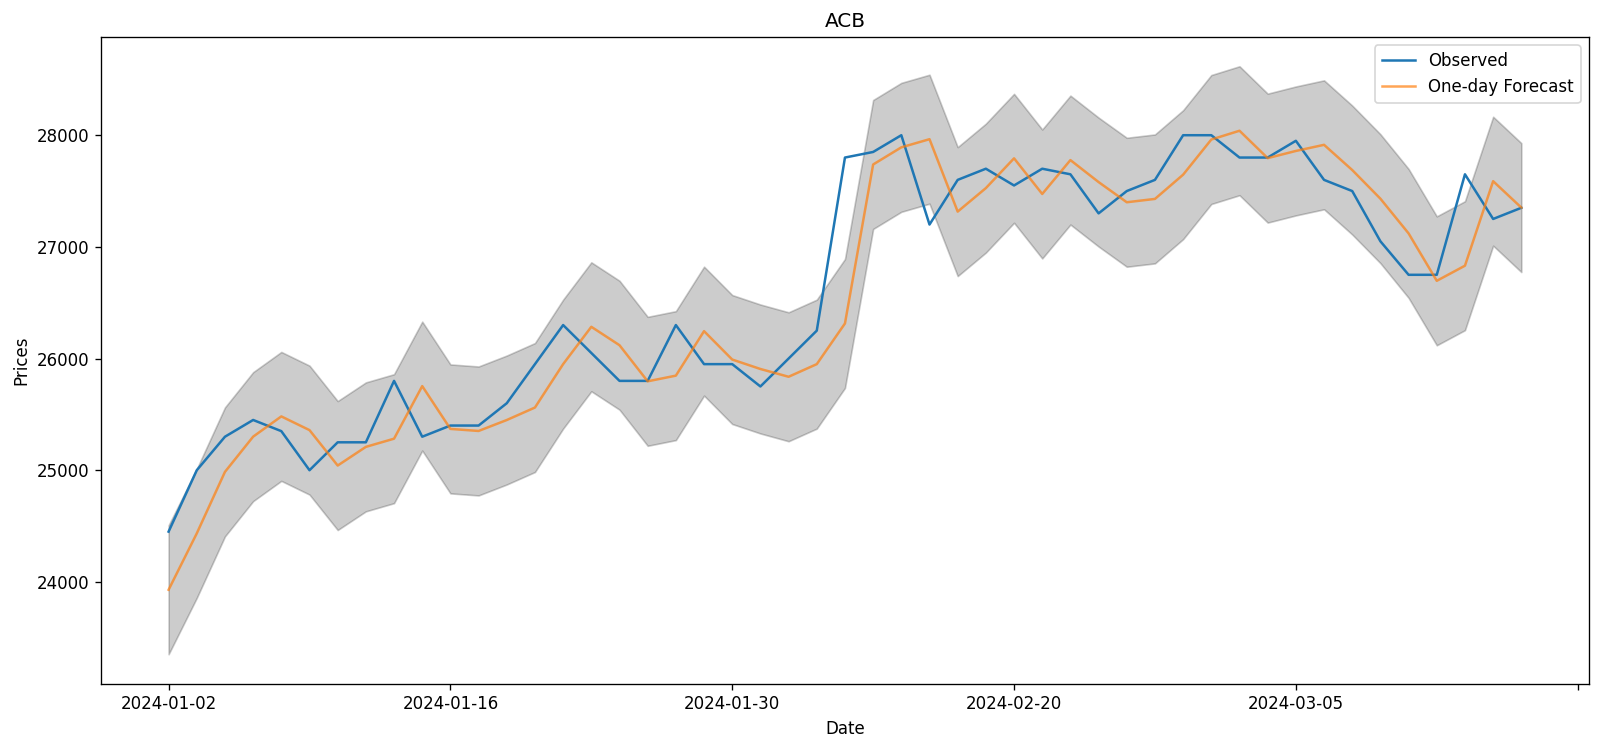

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17643D+00    |proj g|=  1.38272D-01

At iterate    5    f=  7.14002D+00    |proj g|=  3.49900D-02

At iterate   10    f=  7.13861D+00    |proj g|=  1.95901D-02

At iterate   15    f=  7.13840D+00    |proj g|=  2.03236D-03

At iterate   20    f=  7.13813D+00    |proj g|=  3.11452D-02

At iterate   25    f=  7.11286D+00    |proj g|=  2.18855D-01

At iterate   30    f=  7.07023D+00    |proj g|=  9.88457D-02

At iterate   35    f=  7.05647D+00    |proj g|=  6.28643D-03

At iterate   40    f=  7.05644D+00    |proj g|=  8.52448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

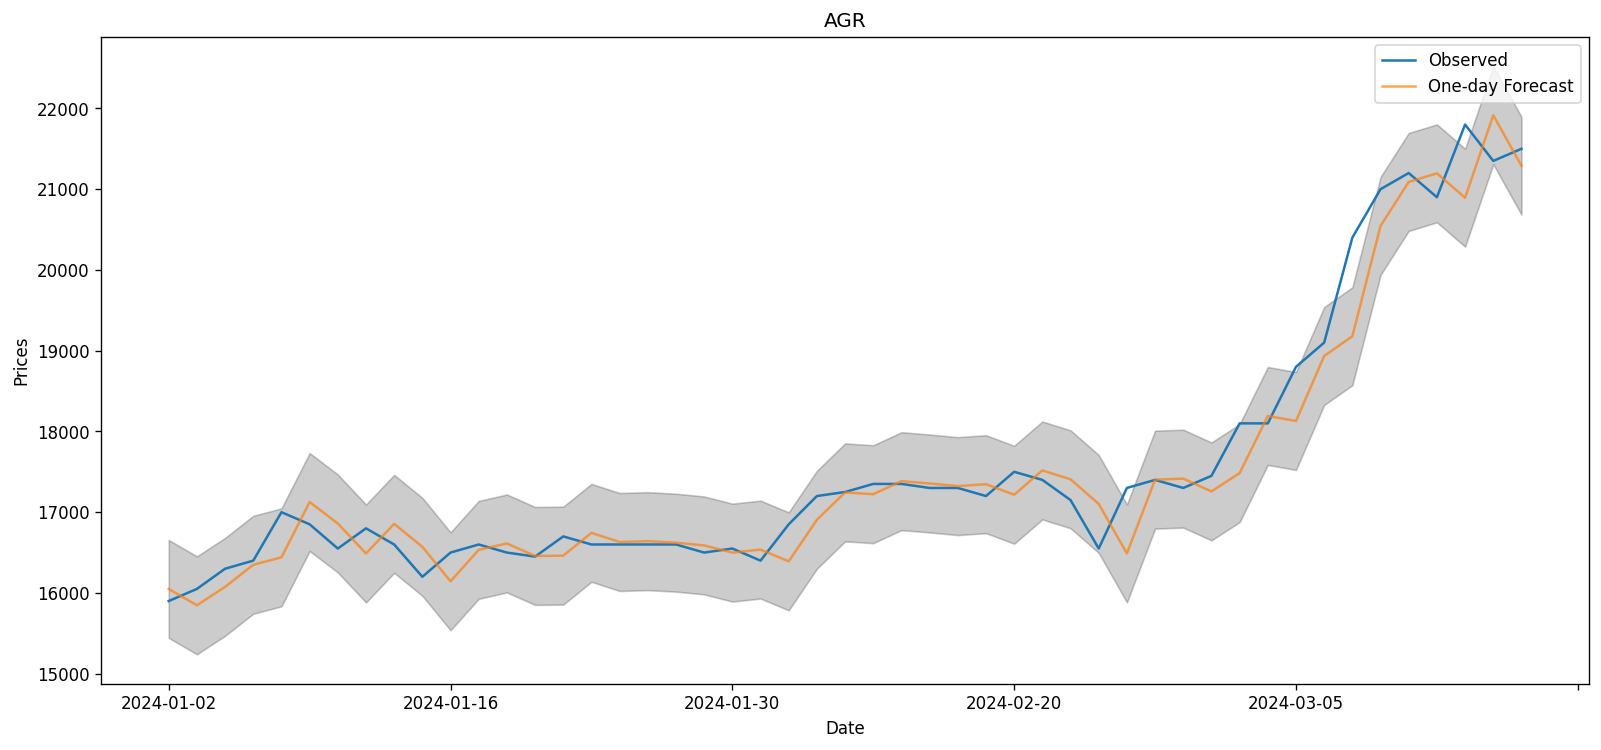

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91402D+00    |proj g|=  1.44671D-01

At iterate    5    f=  7.88445D+00    |proj g|=  2.46128D-02

At iterate   10    f=  7.88385D+00    |proj g|=  8.90898D-04

At iterate   15    f=  7.88378D+00    |proj g|=  8.17154D-03

At iterate   20    f=  7.88332D+00    |proj g|=  2.67558D-03

At iterate   25    f=  7.88330D+00    |proj g|=  2.19886D-03

At iterate   30    f=  7.88310D+00    |proj g|=  4.80903D-02

At iterate   35    f=  7.87686D+00    |proj g|=  2.09615D-01

At iterate   40    f=  7.81749D+00    |proj g|=  2.77427D-01

At iterate   45    f=  7.79950D+00    |proj g|=  7.82453D-03

At iterate   50    f=  7.79901D+00    |proj g|=  8.61835D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

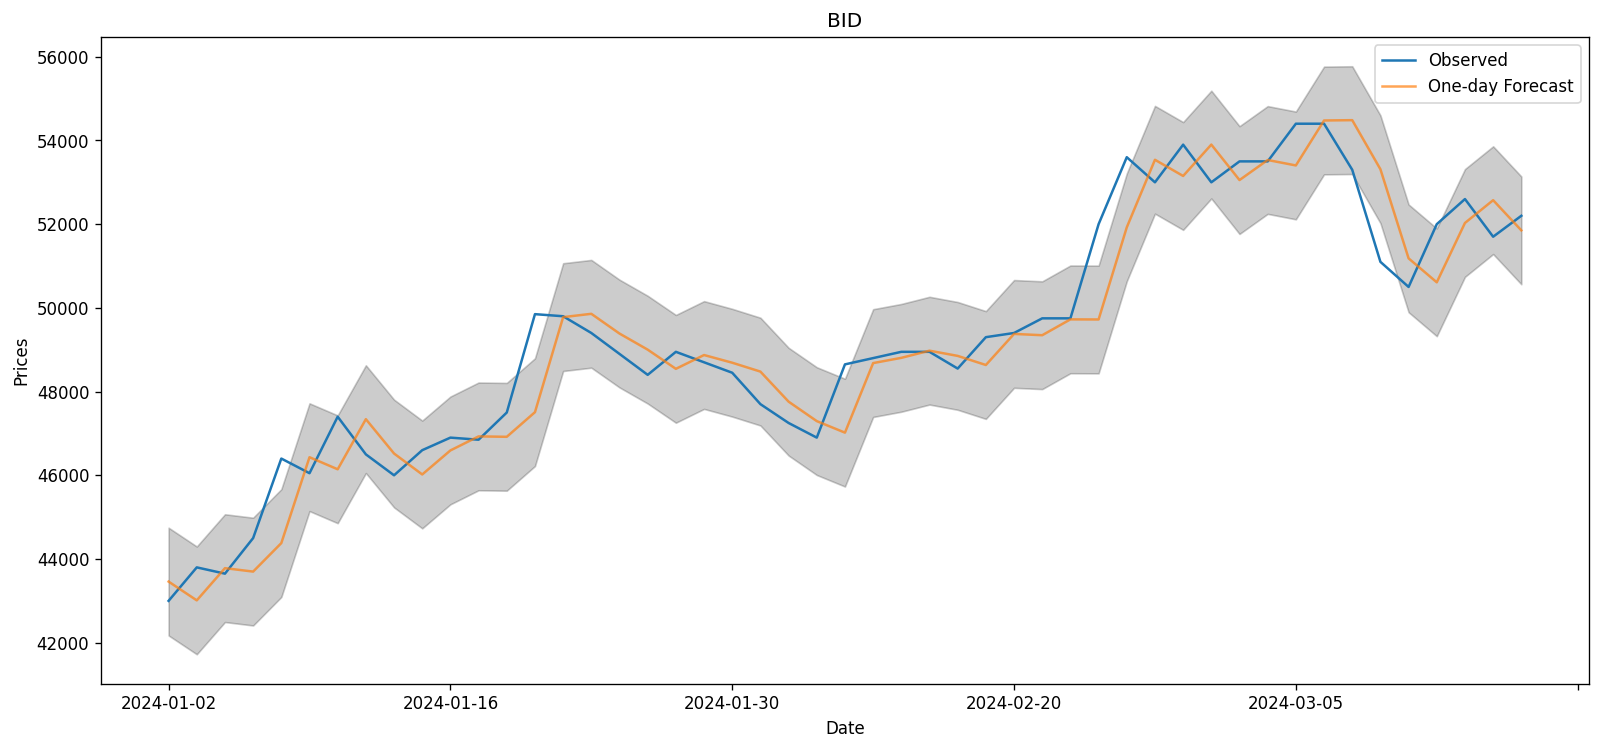

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.34065D+00    |proj g|=  5.64017D-01


 This problem is unconstrained.



At iterate    5    f=  8.31112D+00    |proj g|=  1.92039D-02

At iterate   10    f=  8.30994D+00    |proj g|=  1.60551D-02

At iterate   15    f=  8.30951D+00    |proj g|=  9.99327D-03

At iterate   20    f=  8.30936D+00    |proj g|=  3.52124D-04

At iterate   25    f=  8.30934D+00    |proj g|=  3.88278D-03

At iterate   30    f=  8.30459D+00    |proj g|=  6.90048D-02

At iterate   35    f=  8.22135D+00    |proj g|=  9.26132D-02

At iterate   40    f=  8.21236D+00    |proj g|=  1.57083D-02

At iterate   45    f=  8.21229D+00    |proj g|=  3.56515D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     56   

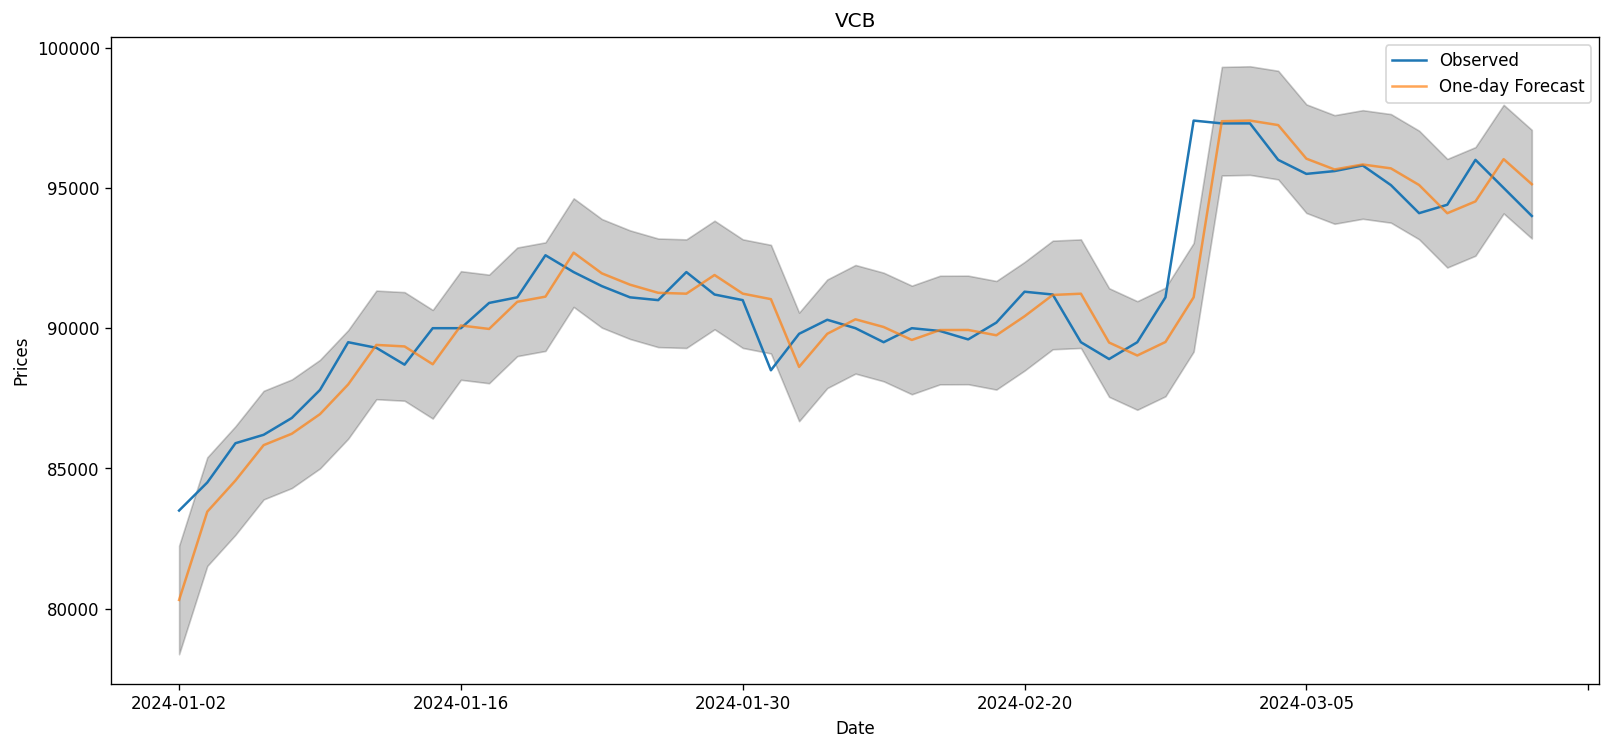

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62298D+00    |proj g|=  1.19308D-01


In [10]:
for stock in df.columns:
    results = one_day(stock)

    pred = results.get_prediction(start='2024-01-02', dynamic=False)
    pred_ci = pred.conf_int()

    ax = df[stock]['2024':].plot(label='Observed', figsize=(16,7))
    pred_plot = pred.predicted_mean
    pred_plot.plot(ax=ax, label='One-day Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    
    #addlabels(df[stock]['2024':], df[stock]['2024':], pred_plot)

    ax.set_title(stock)
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.legend()
    plt.show()